In [3]:
using Random # load the Random package to generate random numbers
using Plots  # load the Plots plotting library

Note: you can add text written in Markdown to this notebook to explain your work and your conclusions by adding a new cell (using the "+" icon on the toolbar), and setting it to be a markdown cell (by toggling the "Code" dropdown on the toolbar to say "Markdown" instead). 

For examples of how to use Markdown, look at the examples in this notebook, or [this cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

# Generate data
Generate 50 random datapoints in 2 dimensions.
Note that the last column is fixed at 1 to capture the offset

In [42]:
### DO NOT CHANGE THIS CODE BLOCK ###
# this code sets the random number generator, 
# so everyone in the class will have consistent results
Random.seed!(3)

# set dimensions
n = 50
d = 2
# generate input: the rows of X are the data points
# notice the last column encodes the offset
X = [randn(n, d) ones(n)]

# Generate the target function w♮
# Store the correct decision for each datapoint in y
w♮ = randn(d+1)
y = sign.(X*w♮);

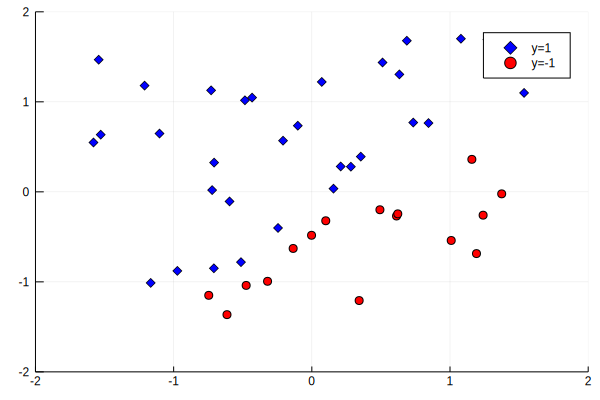

In [43]:
# plot data points X and color according to y
scatter(X[y.==1,1], X[y.==1,2], color=:blue, marker=:diamond, label="y=1")
scatter!(X[y.==-1,1], X[y.==-1,2], color=:red, marker=:circle, label="y=-1")
xlims!((-2,2))
ylims!((-2,2))

In [44]:
"""
This function takes data points X, plots them, and colors them correctly according to y.
This function also plots the line w'*x = 0.
We are plotting just the first two dimensions of x; 
the last (offset) coordinate of w sets the offset of the line from the origin.
"""
function plot_perceptron(X,y,w)
    # plot data points X and color according to y
    p = scatter(X[y.==1,1], X[y.==1,2], color=:blue, marker=:diamond, label="y=1")
    scatter!(p, X[y.==-1,1], X[y.==-1,2], color=:red, marker=:circle, label="y=-1")
    
    # plot vector w
    x1samples = [minimum(X[:,1]), maximum(X[:,1])]
    if w[2]!=0
        plot!(p, x1samples, [-(w[1]*x1 + w[3])/w[2] for x1 in x1samples], color=:black, label="classification boundary")
    end
    
    # set figure limits
    xlims!(p, (-2,2))
    ylims!(p, (-2,2))
    
    return p
end

plot_perceptron

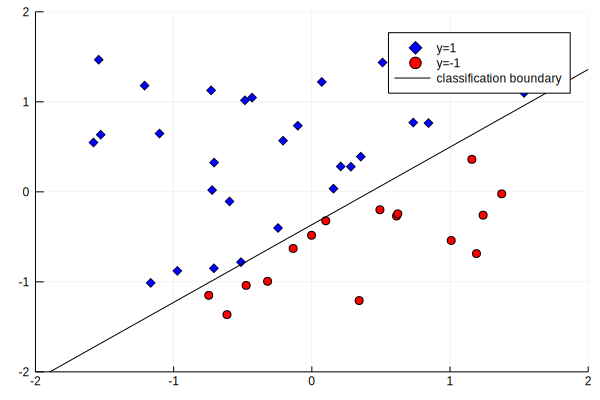

In [45]:
# Double check our function by plotting the points with the truth vector 
plot_perceptron(X,y,w♮)

# a) Code the missing parts of the Perceptron algorithm
Inputs to Perceptron are: 
* required arguments:
    * X = data points
    * Y = true values
* optional arguments:
    * maxsteps = maximum number of updates to w (default: 100)
    * w = initial guess of w (default: random)

Perceptron should start with the input guess of w, make at most maxsteps updates, and return the final w.

In [37]:
function perceptron(X,y;
                    maxsteps=100, # 
                    w = rand(size(X,2))) # initial guess for w
    
    ## YOUR CODE HERE p
    
    return w
end

perceptron (generic function with 1 method)

# b) Run perceptron on linearly separable data set

In [ ]:
w_final = perceptron(X,y)

# c) Run perceptron on data sets of size n = 20, 100, and 1000

# d) Run perceptron on data set of size n = 1000 with dimension d = 10

# e) Run perceptron on dataset from (d) 100 times.
Plot a histogram for the number of updates that the algorithm takes to converge.

For this portion, make sure your perceptron implementation picks the next consideration point x(t) randomly instead of deterministically.

# g) Add an outlier. What happens?

In [48]:
### DO NOT CHANGE THIS CODE BLOCK ###
# (re)generate data with same random seed, adding one outlier
Random.seed!(3)

# set dimensions
n = 50
d = 2
# generate input
X = [randn(n, d) ones(n)]
w♮ = randn(d+1)
y = sign.(X*w♮);
y[1] *= -1 # flip classification of the first data point

1.0

In [49]:
# run the perceptron and see what happens
perceptron(X,y,maxsteps=50)

3-element Array{Float64,1}:
 0.9086642860439373
 0.7327516245131727
 0.8519991902760575

# h) Try out one idea to fix perceptron